In [1]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# Set the start and end date
start = '2018-01-01'
end = '2021-07-12'

# Set the ticker
symbol = 'HINDUNILVR.NS'

# Get the data from Yahoo! Finance
df = yf.download(symbol, start, end)

# Disply the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,1367.000000,1367.000000,1340.050049,1344.500000,1278.513916,746852
2018-01-02,1345.000000,1349.800049,1328.550049,1338.599976,1272.903198,695988
2018-01-03,1344.699951,1356.800049,1335.000000,1350.349976,1284.076538,832810
2018-01-04,1350.099976,1356.150024,1341.449951,1352.250000,1285.883301,640189
2018-01-05,1351.000000,1362.949951,1348.250000,1356.550049,1289.972290,568451
...,...,...,...,...,...,...
2021-07-05,2499.000000,2513.399902,2485.050049,2499.050049,2499.050049,761700
2021-07-06,2490.000000,2497.949951,2469.000000,2472.500000,2472.500000,461782
2021-07-07,2458.000000,2490.800049,2445.850098,2481.649902,2481.649902,623145


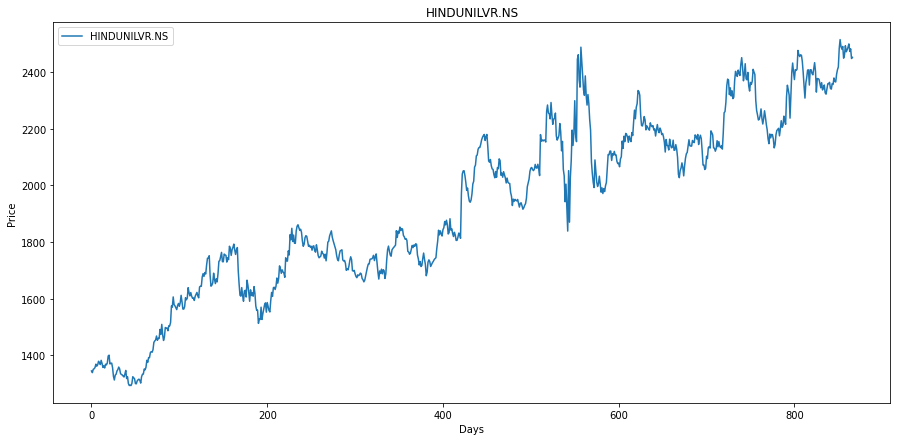

In [3]:
# Plot the close price data
series = df['Close']
series.index = np.arange(series.shape[0])

plt.figure(figsize=(15, 7))

plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(series, label=symbol)

plt.legend()
plt.show()

In [4]:
# Create smooth graph of close price data

from scipy.signal import savgol_filter

month_diff = series.shape[0] // 30
if month_diff == 0:
    month_diff = 1

smooth = int(2 * month_diff + 3)

points = savgol_filter(series, smooth, 7)

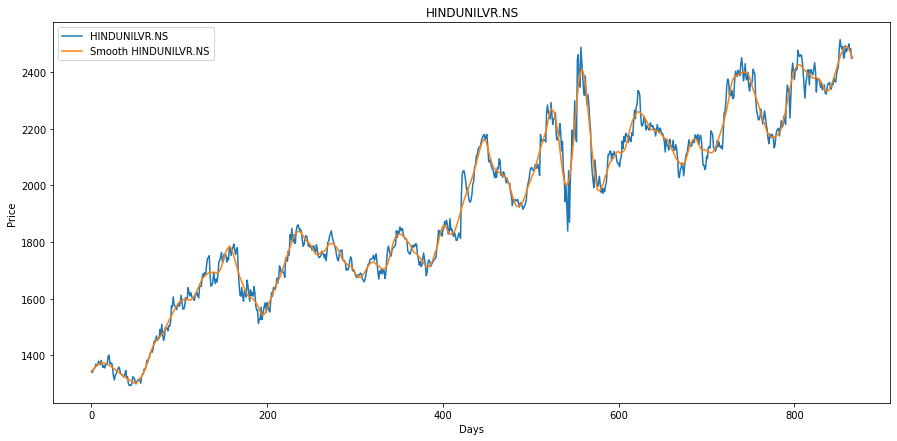

In [5]:
# Plot the smooth price graph over default price graph

plt.figure(figsize=(15,7))

plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Price')

# Close price data
plt.plot(series, label=symbol)

# Smooth close price data
plt.plot(points, label=f'Smooth {symbol}')

plt.legend()
plt.show()

In [6]:
# Function to calculate pythagoras theorem for two points

def pythg(pt1, pt2):
    a_sq = (pt2[0] - pt1[0]) ** 2
    b_sq = (pt2[1] - pt1[1]) ** 2
    return sqrt(a_sq + b_sq)


# Function to calculate local minima and maxima points

def loc_min_max(points):
    loc_minima = []
    loc_maxima = []
    prev_pts = [(0, points[0]), (1, points[1])]
    for i in range(1, len(points) - 1):
        append_to = ''
        if points[i-1] > points[i] < points[i+1]:
            append_to = 'min'
        elif points[i-1] < points[i] > points[i+1]:
            append_to = 'max'
        if append_to:
            if loc_minima or loc_maxima:
                prev_distance = pythg(prev_pts[0], prev_pts[1]) * 0.5
                curr_distance = pythg(prev_pts[1], (i, points[i]))
                if curr_distance >= prev_distance:
                    prev_pts[0] = prev_pts[1]
                    prev_pts[1] = (i, points[i])
                    if append_to == 'min':
                        loc_minima.append((i, points[i]))
                    else:
                        loc_maxima.append((i, points[i]))
            else:
                prev_pts[0] = prev_pts[1]
                prev_pts[1] = (i, points[i])
                if append_to == 'min':
                    loc_minima.append((i, points[i]))
                else:
                    loc_maxima.append((i, points[i]))
                    
    return loc_minima, loc_maxima

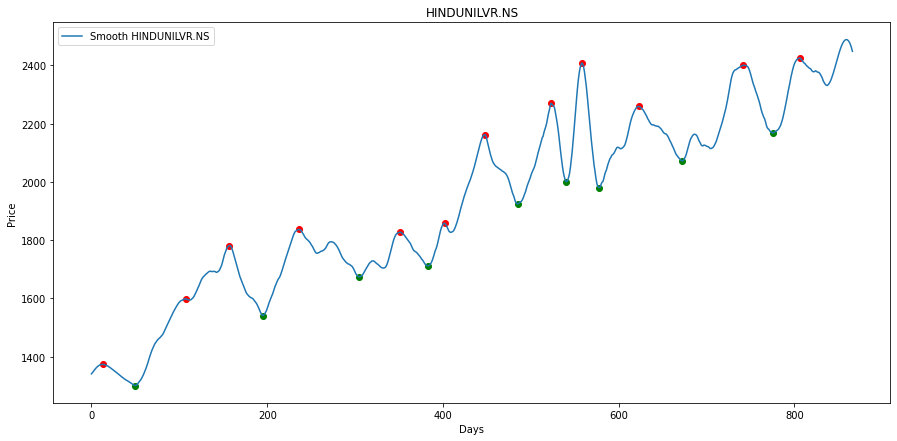

In [7]:
# Store the local minima and maxima points
loc_minima, loc_maxima = loc_min_max(points)

minima_pts = np.array(loc_minima)
maxima_pts = np.array(loc_maxima)

# Plot the local minima and maxima points
plt.figure(figsize=(15,7))

plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Price')

# Smooth close price data
plt.plot(points, label=f'Smooth {symbol}')

# local minima and maxima points
for pt in loc_minima:
    plt.scatter(pt[0], pt[1], c='g')
for pt in loc_maxima:
    plt.scatter(pt[0], pt[1], c='r')

plt.legend()
plt.show()

In [8]:
# The line_mse() function computes and returns the mean squared error for
# the distance of all points from the line passing through points pt1 and pt2.

norm = np.linalg.norm

# Function takes two points pt1, pt2 and the minima/maxima dataset as input.
def line_mse(pt1, pt2, data):
    dist = 0
    dist_sq = 0
    sum_dist_sq = 0
    mean_sq_err = 0
    length = len(data)

    for pt3 in range(0, length):
            p1 = data[pt1]
            p2 = data[pt2]
            p3 = data[pt3]           
            
            # To calculate perpendicular distance of a point from line passing through pt1 and pt2
            dist = np.abs(norm(np.cross(p2-p1, p1-p3)))/norm(p2-p1)            
            # Squared error of a point from line passing through pt1 and pt2
            dist_sq = dist**2
            # Sum of squared errors of all points from line passing through pt1 and pt2
            sum_dist_sq = sum_dist_sq + dist_sq
            
    # Mean squared error formula applied
    mean_sq_err = sum_dist_sq / length
    
    return (mean_sq_err)

In [9]:
# The s_r_lines() function identifies and returns all potential support and 
# resistance line coordinates along with its corresponding mean squared error value.

def s_r_lines(data):
    lines = []
    for pt1 in range(0, len(data) - 1):
        for pt2 in range(0, len(data)):
            if pt1 != pt2:
                mse_val = line_mse(pt1, pt2, data)
                lines.append((data[pt1], data[pt2], mse_val))
    return lines

# Compute and store data of potential support and resistance lines
support_lines = s_r_lines(minima_pts)
resistance_lines = s_r_lines(maxima_pts)


In [10]:
# The 'line_least_mse()' function returns data for the 
# line which has the least mean squared error value.

def line_least_mse(data):
    best_line = []
    # Temporarily assign value of first line in dataset as 'least_mse'
    least_mse = data[0][2]
    
    # Compare MSE values of all lines present in the dataset
    for r in range (0, len(data)):
            if data[r][2] < least_mse:
                
                # Assign the current value to 'least_mse' if 
                # the current value is less than existing value
                least_mse = data[r][2]
                
                # Store data of the line with least mse value
                best_line = data[r]
                
    return best_line

# Support and resistance lines having least MSE value
support = line_least_mse(support_lines)
resistance = line_least_mse(resistance_lines)


In [11]:
support
# Values are in the format: Pt1(x1,y1), Pt2(x2,y2), MSE Value

(array([ 578.        , 1980.45256112]),
 array([ 195.        , 1541.04549061]),
 758.1751282695745)

In [12]:
resistance
# Values are in the format: Pt1(x1,y1), Pt2(x2,y2), MSE Value

(array([ 623.        , 2258.94408086]),
 array([ 107.        , 1598.98845783]),
 4601.941504515801)

In [13]:
# Assign the x and y co-ordinates

# For the support line
s_x1 = support[0][0]
s_x2 = support[1][0]
s_y1 = support[0][1]
s_y2 = support[1][1]

# For the resistance line
r_x1 = resistance[0][0]
r_x2 = resistance[1][0]
r_y1 = resistance[0][1]
r_y2 = resistance[1][1]

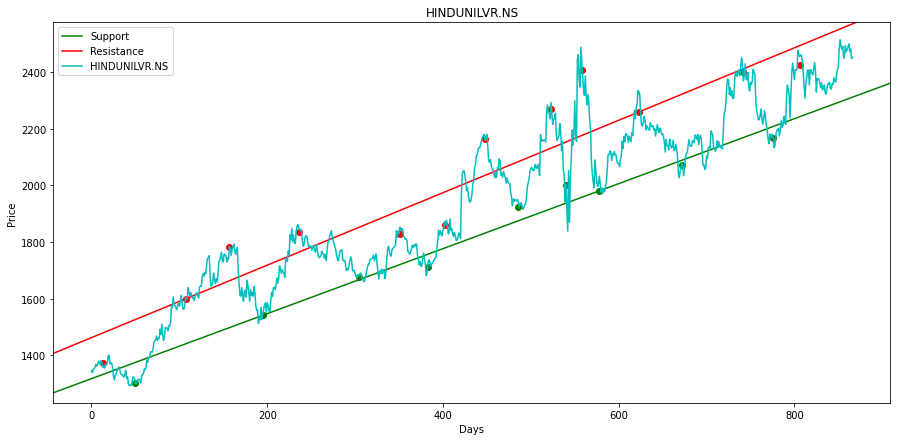

In [14]:
# Plot the support and resistance lines on price graph

plt.figure(figsize=(15,7))

plt.title(symbol)
plt.xlabel('Days')
plt.ylabel('Price')

# Support line
plt.axline((s_x1,s_y1), (s_x2,s_y2), label='Support', c='g')

# Resistance line
plt.axline((r_x1,r_y1), (r_x2,r_y2), label='Resistance', c='r')

# Close price data
plt.plot(series, label=symbol, c='c')

# Local minima and maxima points
for pt in loc_minima:
    plt.scatter(pt[0], pt[1], c='g')
for pt in loc_maxima:
    plt.scatter(pt[0], pt[1], c='r')
    
plt.legend()
plt.show()